In [2]:
#Het lineare model:

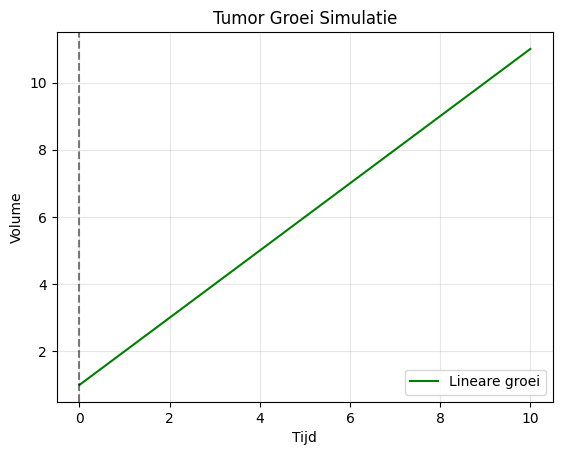

In [12]:
from tumor_ODE import tumorODE
from matplotlib import pyplot as plt

testTumor = tumorODE(1,0.1, 100)

Ts,Vs = testTumor.lineaire_model(1)
testTumor.plot(Ts=Ts,Vs=Vs, color="green", label="Lineare groei")
testTumor.show_plot()

In [4]:
#exp. model:

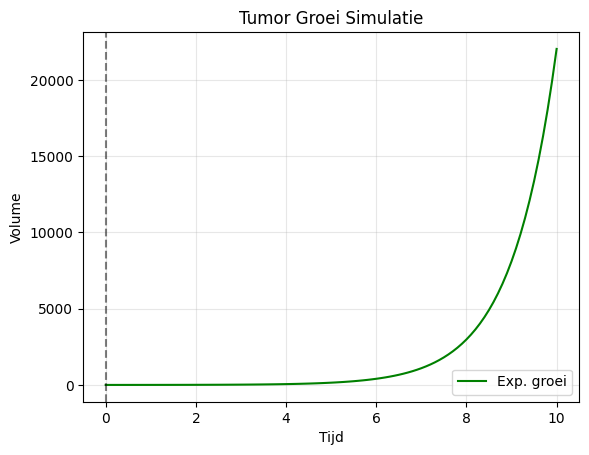

In [14]:
testTumor = tumorODE(1,0.1, 100)

Ts,Vs = testTumor.exponentieel_model(1)
testTumor.plot(Ts=Ts,Vs=Vs, color="green", label="Exp. groei")
testTumor.show_plot()

In [6]:
# Mendelsohn groei: 

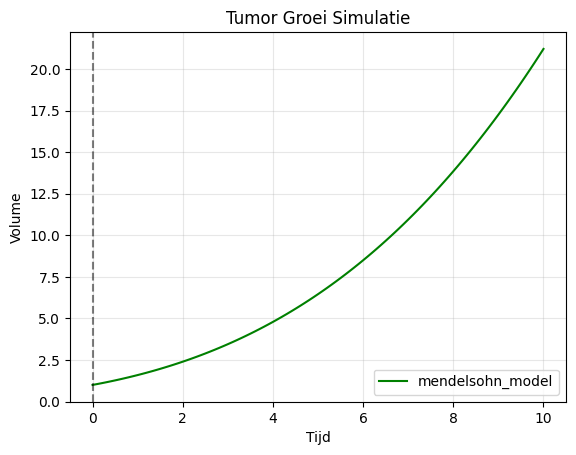

In [26]:
testTumor = tumorODE(1,0.1, 100)

Ts,Vs = testTumor.mendelsohn_model(0.5,0.7)
testTumor.plot(Ts=Ts,Vs=Vs, color="green", label="mendelsohn_model")
testTumor.show_plot()

In [8]:
# linear gelimiteerde groei:

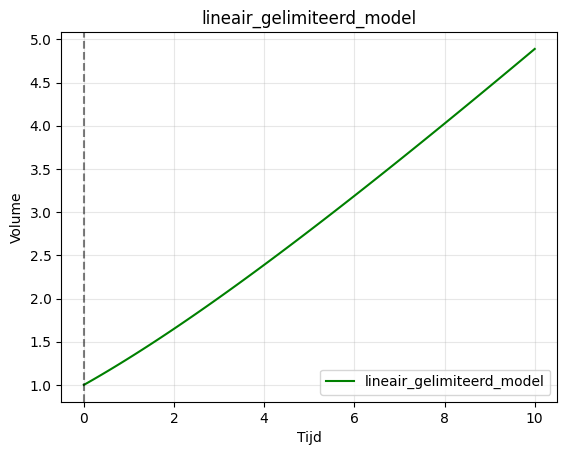

In [30]:
testTumor = tumorODE(1,0.1, 100)

Ts,Vs = testTumor.lineair_gelimiteerd_model(0.5,0.7)
testTumor.plot(Ts=Ts,Vs=Vs, color="green", label="lineair_gelimiteerd_model")
testTumor.show_plot("lineair_gelimiteerd_model")

In [ ]:
# oppervlak_gelimiteerdegroei_model:

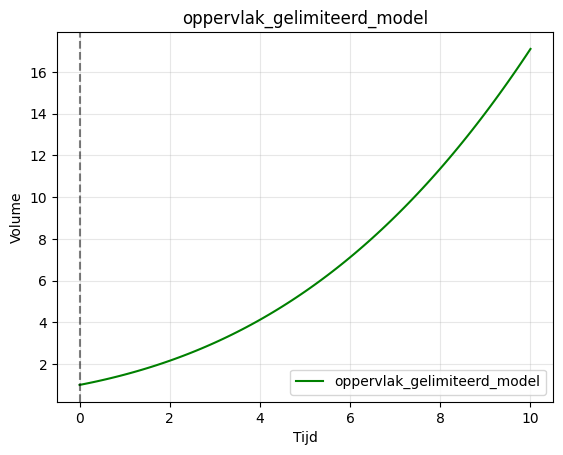

In [32]:
testTumor = tumorODE(1,0.1, 100)

Ts,Vs = testTumor.oppervlak_gelimiteerd_model(0.5,0.7)
testTumor.plot(Ts=Ts,Vs=Vs, color="green", label="oppervlak_gelimiteerd_model")
testTumor.show_plot("oppervlak_gelimiteerd_model")

In [12]:
# exponentieel afvlakkendegroei model:

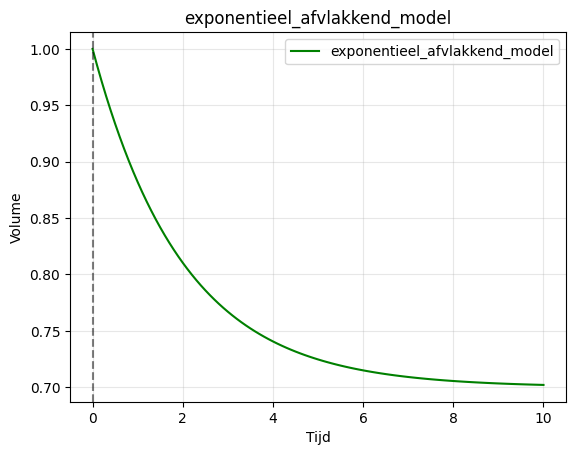

In [34]:
testTumor = tumorODE(1,0.1, 100)

Ts,Vs = testTumor.exponentieel_afvlakkend_model(0.5,0.7)
testTumor.plot(Ts=Ts,Vs=Vs, color="green", label="exponentieel_afvlakkend_model")
testTumor.show_plot("exponentieel_afvlakkend_model")

In [14]:
# von_bertalanffy_model

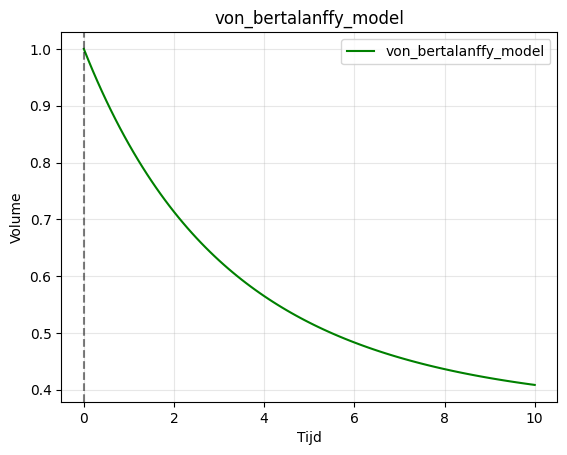

In [37]:
testTumor = tumorODE(1,0.1, 100)

Ts,Vs = testTumor.von_bertalanffy_model(0.5,0.7)
testTumor.plot(Ts=Ts,Vs=Vs, color="green", label="von_bertalanffy_model")
testTumor.show_plot("von_bertalanffy_model")

In [16]:
# allee_effect_groei

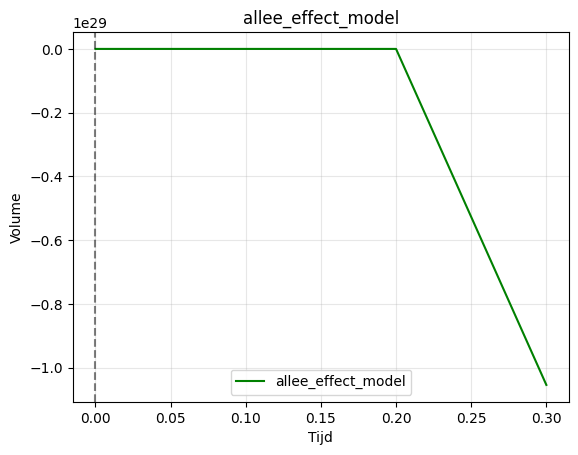

In [49]:
testTumor = tumorODE(1,0.1, 1000)

Ts,Vs = testTumor.allee_effect_model(1,2,20)
testTumor.plot(Ts=Ts,Vs=Vs, color="green", label="allee_effect_model")
testTumor.show_plot("allee_effect_model")

In [42]:
# gompertz_groei:

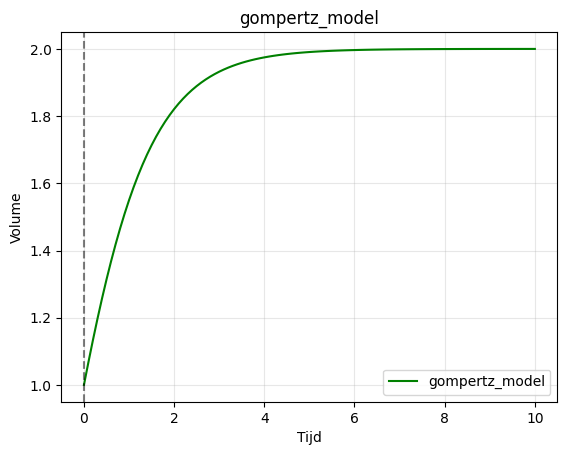

In [54]:
testTumor = tumorODE(1,0.1, 100)

Ts,Vs = testTumor.gompertz_model(1,2)
testTumor.plot(Ts=Ts,Vs=Vs, color="green", label="gompertz_model")
testTumor.show_plot("gompertz_model")

In [55]:
# Kleine testdataset van: [S.S. Hassan & H.M. Al-Saedi, 2024](https://doi.org/10.1051/bioconf/20249700118)
Ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

modeler = tumorODE(volume=Ts[0], delta_t=1, n=120)

In [ ]:
modellen_lijst = [
    (modeler.lineaire_model, {"c": 10}),
    (modeler.exponentieel_model, {"c": 0.1}),
    (modeler.mendelsohn_model, {"c": 0, "d": 0}),
    (modeler.logistisch_model, {"c": 0.2, "V_max": 800}),
    (modeler.gompertz_model, {"c": 0.2, "V_max": 800}),
    (modeler.von_bertalanffy_model, {"c": 0.5, "d": 0.1}),
    (modeler.exponentieel_afvlakkend_model, {"c": 0.1, "V_max": 800}),
    (modeler.lineair_gelimiteerd_model, {"c": 100, "d": 500}),
]

In [64]:
resultaten = []
for model_func, start_params in modellen_lijst:
        res = modeler.fit_and_evaluate(model_func, start_params, Ts, Vs)
        resultaten.append(res)
        print(f"{res["model_naam"]}, MSE: {res["mse"]:.3f}, AIC: {res["AIC"]:.3f},AICc: {res["AICc"]:.3f}, BIC: {res["BIC"]:.3f}")
        print()


resultaten.sort(key=lambda x: x["AIC"])
beste_resultaat = resultaten[0]

lineaire_model, MSE: 208135.645, AIC: 185.689,AICc: 185.997, BIC: 186.397

exponentieel_model, MSE: 4184995.067, AIC: 230.705,AICc: 231.013, BIC: 231.413

mendelsohn_model, MSE: 39628.951, AIC: 162.810,AICc: 163.810, BIC: 164.226

logistisch_model, MSE: 4184995.067, AIC: 232.705,AICc: 233.705, BIC: 234.121

gompertz_model, MSE: 4184995.067, AIC: 232.705,AICc: 233.705, BIC: 234.121

von_bertalanffy_model, MSE: 4184995.067, AIC: 232.705,AICc: 233.705, BIC: 234.121

exponentieel_afvlakkend_model, MSE: 208457.853, AIC: 187.712,AICc: 188.712, BIC: 189.128

lineair_gelimiteerd_model, MSE: 4184995.067, AIC: 232.705,AICc: 233.705, BIC: 234.121



Beste model: mendelsohn_model
Optimale parameters: {'c': 1.018148461303884, 'd': 0.5036471392961981}


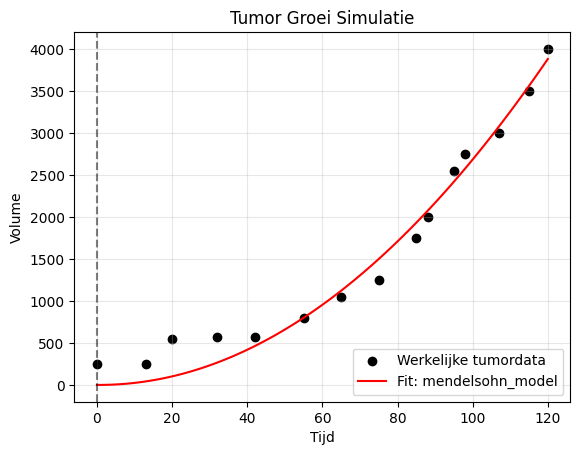

In [74]:
print(f"Beste model: {beste_resultaat["model_naam"]}")
print(f"Optimale parameters: {beste_resultaat["best_params"]}")

plt.scatter(Ts, Vs, color="black", label="Werkelijke tumordata")


beste_func = beste_resultaat["functie"]
beste_params = beste_resultaat["best_params"]
ts, vs = beste_func(**beste_params)

modeler.plot(ts, vs, color="red", label=f"Fit: {beste_resultaat['model_naam']}")

modeler.show_plot()

In [ ]:
# De scores van dit beste model:
print(beste_resultaat["model_naam"])
print(beste_resultaat["best_params"])
print()

print(f"{beste_resultaat["BIC"]:.3f}")
print(f"{beste_resultaat["AIC"]:.3f}")
print(f"{beste_resultaat["AICc"]:.3f}")


mendelsohn_model
{'c': 1.018148461303884, 'd': 0.5036471392961981}

164.226
162.810
163.810


Beste model: lineaire_model
Optimale parameters: {'c': 25.903300717228866}


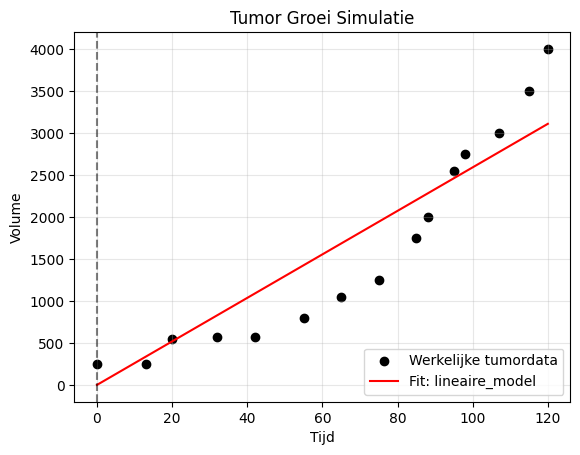

BIC: 186.397
AIC: 185.689
AICc: 185.997


In [84]:
# Het zelfde voor het op een na beste model, beduidend hoger dan de beste.
bijna_beste_resultaat = resultaten[1]
print(f"Beste model: {bijna_beste_resultaat["model_naam"]}")
print(f"Optimale parameters: {bijna_beste_resultaat["best_params"]}")

plt.scatter(Ts, Vs, color="black", label="Werkelijke tumordata")


beste_func = bijna_beste_resultaat["functie"]
beste_params = bijna_beste_resultaat["best_params"]
ts, vs = beste_func(**beste_params)

modeler.plot(ts, vs, color="red", label=f"Fit: {bijna_beste_resultaat['model_naam']}")

modeler.show_plot()

print(f"BIC: {bijna_beste_resultaat["BIC"]:.3f}")
print(f"AIC: {bijna_beste_resultaat["AIC"]:.3f}")
print(f"AICc: {bijna_beste_resultaat["AICc"]:.3f}")